<a href="https://colab.research.google.com/github/AndreyLFR/Library_np_pd/blob/master/lesson_Numpy_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LESSON 2. Matplotlib

Task1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

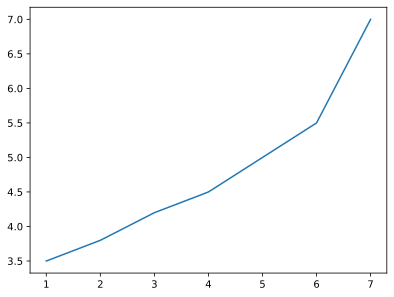

In [6]:
x = np.arange(1, 8)
y = np.array([3.5, 3.8, 4.2, 4.5, 5, 5.5, 7])

plt.plot(x, y)
plt.show()

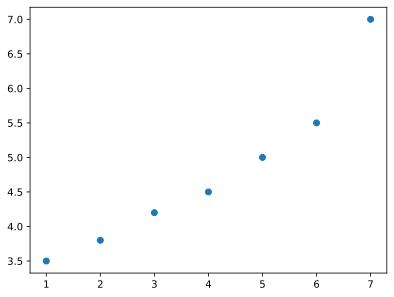

In [7]:
plt.scatter(x, y)
plt.show()

Task2

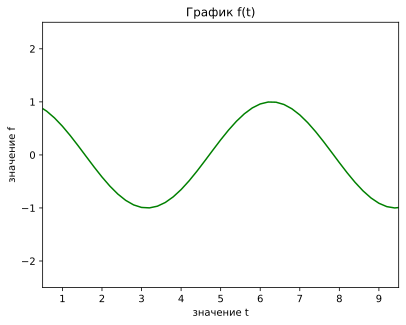

In [14]:
t = np.linspace(0, 10, num=51, endpoint=True)
f = np.cos(t)
plt.plot(t,f,color='g')
plt.title('График f(t)')
plt.xlabel('значение t')
plt.ylabel('значение f')
plt.xlim(0.5, 9.5)
plt.ylim(-2.5, 2.5)
plt.show()

Task3

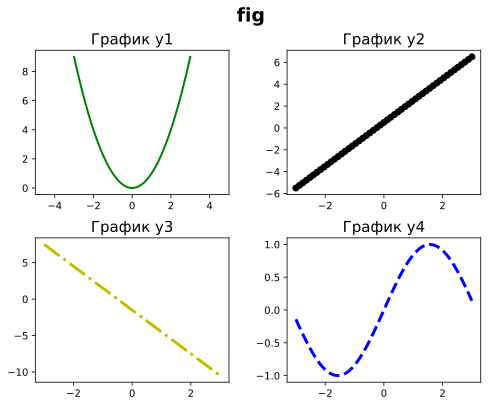

In [23]:
x = np.linspace(-3, 3, num=51, endpoint=True)
y1 = x**2
y2 = 2*x + 0.5
y3 = -3*x - 1.5
y4 = np.sin(x)

fig, ax = plt.subplots(2, 2, figsize=[8, 6])
fig.suptitle('fig', fontsize=19, fontweight='bold')
c1 = ax[0,0].plot(x, y1, 'g', linewidth=2)
ax[0,0].set_title('График y1', fontsize=15)
ax[0,0].set_xlim([-5, 5])

c2 = ax[0,1].scatter(x, y2, color='k')
ax[0,1].set_title('График y2', fontsize=15)

c3 = ax[1,0].plot(x, y3, '-.y', linewidth=3)
ax[1,0].set_title('График y3', fontsize=15)

c4 = ax[1,1].plot(x, y4, '--b', linewidth=3)
ax[1,1].set_title('График y4', fontsize=15)

plt.subplots_adjust(wspace= 0.3,
                    hspace=0.3)

plt.show()

Task4

In [25]:
import pandas as pd

In [41]:
df = pd.read_csv('/content/sample_data/creditcard.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

[]

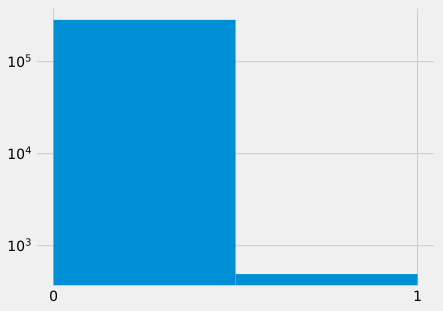

In [49]:
df['Class'].value_counts()
target = df['Class'].to_numpy()

plt.style.use('fivethirtyeight')
plt.hist(target, bins=2)
plt.xticks(np.arange(0, 2, 1))
plt.semilogy ()

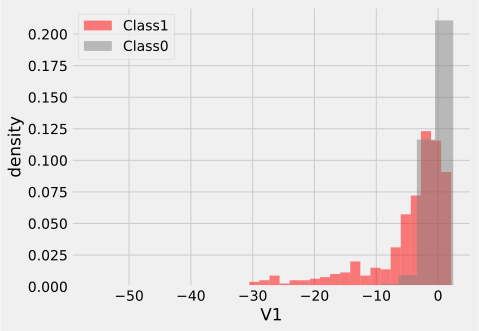

In [71]:
data1 = df.loc[(df['Class'] == 1)]
data2 = df.loc[(df['Class'] == 0)]


data1['V1'].hist(density=1 , alpha=0.5, label='Class1', color='red', bins=20)
data2['V1'].hist(density=1, alpha=0.5, label='Class0', color='grey', bins=20)
plt.legend()
plt.xlabel('V1')
plt.ylabel('density')
plt.show()

Задание на повторение

In [73]:
a = np.linspace(12, 24, num=12, endpoint=False, dtype = int)
a

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [81]:
b = np.asarray([[x] for x in a]).reshape(4, 3)
b

array([[12, 13, 14],
       [15, 16, 17],
       [18, 19, 20],
       [21, 22, 23]])

In [82]:
b = np.asarray([[x] for x in a]).reshape(2, 6)
b

array([[12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [83]:
b = np.asarray([[x] for x in a]).reshape(6, 2)
b

array([[12, 13],
       [14, 15],
       [16, 17],
       [18, 19],
       [20, 21],
       [22, 23]])

LESSON 1. Numpy

Task1

In [ ]:
import numpy as np

In [ ]:
a = np.array([[1, 2, 3, 3, 1], [6, 8, 11, 10, 7]]).transpose()
mean_a = np.mean(a, axis=0)
mean_a

array([2. , 8.4])

Task2

In [ ]:
a_centered = a - mean_a
a_centered.shape

(5, 2)

In [ ]:
a_centered

array([[-1. , -2.4],
       [ 0. , -0.4],
       [ 1. ,  2.6],
       [ 1. ,  1.6],
       [-1. , -1.4]])

Task3

In [ ]:
a_centered_sp = np.dot(a_centered[:, 0], a_centered[:, 1])
a_centered_sp / (a.shape[0] - 1)

2.0

Task4

In [ ]:
np.cov(a.transpose())[0, 1]

2.0

PANDAS
Task1

In [ ]:
import pandas as pd


authors = pd.DataFrame()
authors['author_id'] = [1, 2, 3]
authors['author_name'] = ['Тургенев', 'Чехов', 'Островский']

book = pd.DataFrame()
book['author_id'] = [1, 1, 1, 2, 2, 3, 3]
book['book_title'] = ['Отцы и дети', 'Рудин', 'Дворянское гнездо', 'Толстый и тонкий', 'Дама с собачкой', 'Гроза', 'Таланты и поклонники']
book['price'] = [500, 400, 300, 350, 450, 600, 200]

Task2

In [ ]:
authors_price = pd.merge(authors, book, left_on='author_id', right_on='author_id', how='right')
authors_price

,author_id,author_name,book_title,price
0,1,Тургенев,Отцы и дети,500
1,1,Тургенев,Рудин,400
2,1,Тургенев,Дворянское гнездо,300
3,2,Чехов,Толстый и тонкий,350
4,2,Чехов,Дама с собачкой,450
5,3,Островский,Гроза,600
6,3,Островский,Таланты и поклонники,200


Task3

In [ ]:
top_5 = authors_price.sort_values(by='price', ascending=False).head(5)
top_5

,author_id,author_name,book_title,price
5,3,Островский,Гроза,600
0,1,Тургенев,Отцы и дети,500
4,2,Чехов,Дама с собачкой,450
1,1,Тургенев,Рудин,400
3,2,Чехов,Толстый и тонкий,350


Task4

In [ ]:
def stat_prm(df, author_name):
    mean_ = df.loc[df['author_name'] == author_name, 'price'].mean()
    max_ = df.loc[df['author_name'] == author_name, 'price'].max()
    min_ = df.loc[df['author_name'] == author_name, 'price'].min()
    return [mean_, max_, min_]

authors_stat = pd.DataFrame(columns=['author_name', 'min_price', 'max_price', 'mean_price'])
authors_stat['author_name'] = authors_price['author_name'].unique()

authors_stat['min_price'] = authors_stat['author_name'].apply ( lambda x: stat_prm(authors_price, x)[2])
authors_stat['max_price'] = authors_stat['author_name'].apply ( lambda x: stat_prm(authors_price, x)[1])
authors_stat['mean_price'] = authors_stat['author_name'].apply ( lambda x: stat_prm(authors_price, x)[0])

authors_stat

,author_name,min_price,max_price,mean_price
0,Тургенев,300,500,400.0
1,Чехов,350,450,400.0
2,Островский,200,600,400.0


Task5

In [ ]:
authors_price['cover'] = ['твердая', 'мягкая', 'мягкая', 'твердая', 'твердая', 'мягкая', 'мягкая']
?pd.pivot_table

In [ ]:
authors_price

,author_id,author_name,book_title,price,cover
0,1,Тургенев,Отцы и дети,500,твердая
1,1,Тургенев,Рудин,400,мягкая
2,1,Тургенев,Дворянское гнездо,300,мягкая
3,2,Чехов,Толстый и тонкий,350,твердая
4,2,Чехов,Дама с собачкой,450,твердая
5,3,Островский,Гроза,600,мягкая
6,3,Островский,Таланты и поклонники,200,мягкая


In [ ]:
df = authors_price[['author_name', 'price', 'cover']]
book_info = df.pivot_table(index=['author_name'], columns=['cover'], aggfunc=[np.sum], fill_value= 0)
book_info

sum        
             price        
cover       мягкая твердая
author_name               
Островский     800       0
Тургенев       700     500
Чехов            0     800

In [ ]:
import pickle

with open('book_info.pkl', 'wb') as f:
     pickle.dump(book_info, f)

with open('book_info.pkl', 'rb') as f:
     book_info2 = pickle.load(f)

book_info2

sum        
             price        
cover       мягкая твердая
author_name               
Островский     800       0
Тургенев       700     500
Чехов            0     800